## 收集

In [1]:
import pandas as pd
import numpy as np
import requests
import json
import re
import seaborn as sns
import matplotlib.pyplot as plt

### 收集推特文档: 

In [2]:
df = pd.read_csv('twitter-archive-enhanced.csv')

### 收集推特图像文件：

In [3]:
# 从网站下载图像预测数据
url = "https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/数据清洗/WeRateDogs项目/image-predictions.tsv"
response = requests.get(url)

In [4]:
# HTML保存到本地文件
with open("image-predictions.tsv", mode='wb') as file:
    file.write(response.content)

In [5]:
# 导入dataframe
df_image = pd.read_csv("image-predictions.tsv",sep='\t')

### 收集推特附加文档：

In [6]:
# 导入tweet_json.txt到dataframe
file = open('tweet_json.txt', 'r')
dic = dict()
df_extra = pd.DataFrame()
for line in file.readlines():
    dic = json.loads(line)
    df_extra = df_extra.append(pd.DataFrame([list(dic.values())], columns=list(dic.keys())), ignore_index=True)


## 评估

#### 观察df表格总体数据

In [7]:
print(df.head())

             tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  r

#### 观察df表的数据总数，类型

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### 观察text列与分子分母评分的提取情况

In [9]:
pd.set_option('max_colwidth', 200)
df[['text', 'rating_numerator', 'rating_denominator']].head()

,text,rating_numerator,rating_denominator
0,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10
1,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10
2,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10
3,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10
4,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10


#### 观察分母评分不等于10的记录

In [10]:
df[df['rating_denominator']!=10][['text','rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,@docmisterio account started on 11/15/15,11,15
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50


#### 观察分子评分大于20的记录

In [11]:
df[df.rating_numerator>20][['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
188,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,10
189,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,10
290,@markhoppus 182/10,182,10
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150


#### 观察text列与名字的提取情况

In [12]:
pd.set_option('max_colwidth',200)
df[df['name']!='None'][['text','name']]

,text,name
0,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,Phineas
1,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",Tilly
2,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,Archie
3,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,Darla
4,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",Franklin
6,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,Jax
8,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,Zoey
9,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,Cassie
10,This is Koda. He is a South Australian deckshark. Deceptively deadly. Frighteningly majestic. 13/10 would risk a petting #BarkWeek https://t.co/dVPW0B0Mme,Koda
11,This is Bruno. He is a service shark. Only gets out of the water to assist you. 13/10 terrifyingly good boy https://t.co/u1XPQMl29g,Bruno


#### 观察有哪些名字

In [13]:
df['name'].value_counts()

None          745
a              55
Charlie        12
Oliver         11
Lucy           11
Cooper         11
Lola           10
Tucker         10
Penny          10
Winston         9
Bo              9
the             8
Sadie           8
Bailey          7
Toby            7
Buddy           7
Daisy           7
an              7
Scout           6
Bella           6
Leo             6
Stanley         6
Milo            6
Koda            6
Jax             6
Rusty           6
Jack            6
Dave            6
Oscar           6
Larry           5
             ... 
Remus           1
Bradley         1
Maks            1
Tedders         1
Mutt            1
Rupert          1
Saydee          1
Creg            1
Bruno           1
Tommy           1
Beya            1
Tycho           1
Baron           1
Amélie          1
Kollin          1
Mark            1
Edd             1
Richie          1
Oddie           1
Comet           1
Mingus          1
Chuq            1
Farfle          1
Yukon           1
Naphaniel 

#### 观察text列与狗狗地位的提取情况

In [14]:
pd.set_option('colwidth', 200)
df[['text', 'doggo', 'floofer', 'pupper', 'puppo']]

,text,doggo,floofer,pupper,puppo
0,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,None,None,None,None
1,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",None,None,None,None
2,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,None,None,None,None
3,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,None,None,None,None
4,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",None,None,None,None
5,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,None,None,None,None
6,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,None,None,None,None
7,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,None,None,None,None
8,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,None,None,None,None
9,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,doggo,None,None,None


#### 观察推文链接的空值数量

In [15]:
df.expanded_urls.isnull().sum()

59

#### 观察df_image表格的总体数据

In [16]:
print(df_image.head())

             tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheep

#### 观察df_image的数据信息

In [17]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### 观察图片链接是否有重复

In [18]:
df_image.jpg_url.duplicated().sum()

66

#### 观察df_extra表格的总体数据

In [19]:
pd.set_option('colwidth', 1000)
pd.set_option('max_columns', 35)
df_extra.head(1)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}",39467,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,None,892420643555336193,892420643555336193,None,None,None,None,None,False,en,None,False,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com', 'url': 'https://t.co/N7sNNHAEXS', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 3200889, 'friends_count': 104, 'listed_count': 2784, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 114031, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 5288, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://ab..."


#### 观察df_extra表格的数据信息

In [20]:
df_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null object
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null object
in_reply_to_user_id_str          78 non-null objec



### 质量问题
#### `推特档案`表格
- 推特回复列有缺失值，包括：in_reply_to_status_id, in_reply_to_user_id
- ID列以整型数据存储
- 时间戳是字符串类型
- 评分值问题，包括部分记录出现多个评分、分母列含有10以外的数值、分子列出现很大的异常值
- 名字列出现了'a'和'the'的非人名记录
- 索引为200的记录出现doggo和floofer两个狗狗的地位，实际上不属于doggo地位


#### `推特图像`表格
- 图像预测数据的变量名不能很好地表示变量内容
- `推特图像`表格的图片链接有66条重复内容


#### `推特附加数据`表格
- contributors, cordinates, geo列全部是缺失值


### 清洁度
- `推特档案`表格的地位种类分成4列显示 （不符合一个变量占用一列）
- `推特附加档案`id_str和id列的内容是重复的
- 三个表格共同的列(推特id）



## 清理

#### 首先对原始数据进行备份

In [297]:
df_clean = df.copy()
df_image_clean = df_image.copy()
df_extra_clean = df_extra.copy()

## 项目清洗需求
只保留有图片的推特记录，并且不包含转发的推特

In [298]:
# 删除无图片的推特
df_clean = df_clean[df_clean.expanded_urls.notnull()]

# 删除转发的推特记录
df_clean = df_clean[df_clean.retweeted_status_id.isnull()]

In [299]:
# 删除关于转发的列，retweeted_status_id, retweeted_status_user_id, retweedted_status_timestamp
df_clean = df_clean.drop(labels=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

重新查看数据集信息

In [300]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2117 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2117 non-null object
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null int64
rating_denominator       2117 non-null int64
name                     2117 non-null object
doggo                    2117 non-null object
floofer                  2117 non-null object
pupper                   2117 non-null object
puppo                    2117 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 248.1+ KB


### 回复记录存在缺失值，包括：in_reply_to_status_id, in_reply_to_user_id
#### *定义*
把缺失值全部填充字符串'missing'

#### *代码*

In [301]:
df_clean = df_clean.fillna(value='missing')

#### *测试*
统计空值总数

In [302]:
df_clean.isnull().sum()

tweet_id                 0
in_reply_to_status_id    0
in_reply_to_user_id      0
timestamp                0
source                   0
text                     0
expanded_urls            0
rating_numerator         0
rating_denominator       0
name                     0
doggo                    0
floofer                  0
pupper                   0
puppo                    0
dtype: int64

### tweet_id列以整型数据存储
#### *定义*
更改为文本类型
#### *代码*

In [303]:
df_clean['tweet_id'] = df_clean['tweet_id'].astype('object')

#### 重新查看tweet_id类型

In [304]:
df_clean.tweet_id.dtype

dtype('O')

### timestamp列是字符串类型

#### *定义*
使用pandas的to_datetime函数把时间戳列转换为时间类型

#### *代码*

In [305]:
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

#### *测试*  
重新查看timestamp列类型

In [306]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2117 non-null object
in_reply_to_status_id    2117 non-null object
in_reply_to_user_id      2117 non-null object
timestamp                2117 non-null datetime64[ns]
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null int64
rating_denominator       2117 non-null int64
name                     2117 non-null object
doggo                    2117 non-null object
floofer                  2117 non-null object
pupper                   2117 non-null object
puppo                    2117 non-null object
dtypes: datetime64[ns](1), int64(2), object(11)
memory usage: 248.1+ KB


### 评分值问题: 部分记录出现多个评分
#### *定义*
筛选所有存在1个以上评分的记录，按正确的评分逐个修正`rating_numerator`和`rating_demonirator`两列
#### *代码*

In [307]:
list_MultiScore = df_clean['text'].str.findall(r'(\d+\/\d+)')
index_MultiScore = []
# counter = 0
for index in list_MultiScore.index:
    item = list_MultiScore[index]
    if len(item) > 1:
        index_MultiScore.append(index)
#        print(item)
#         print(item)
#    counter += 1

In [308]:
df_clean[['text','rating_numerator','rating_denominator']].loc[index_MultiScore]

,text,rating_numerator,rating_denominator
766,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",12,10
1007,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,10,10
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1222,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,10,10
1359,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,9,10
1459,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",4,10
1465,Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ,10,10
1508,When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk0KpoWM,5,10


In [309]:
# 第1662条记录：7/11是便利店名称，更正为另一个评分
index = 1662
score_correct = re.findall(r'\d+\/\d+', df_clean.loc[index,'text'])[1]
df_clean.loc[index, 'rating_numerator'] = score_correct.partition('/')[0]
df_clean.loc[index, 'rating_denominator'] = score_correct.partition('/')[2]
df_clean.loc[index, ['rating_numerator', 'rating_denominator']]

rating_numerator      10
rating_denominator    10
Name: 1662, dtype: object

In [310]:
# 第1068条条记录，9/11是日期，更正为另一个评分
indexes = [1068]
for index in indexes:
    score_correct = re.findall(r'\d+\/\d+', df_clean.loc[index,'text'])[1]
    df_clean.loc[index, 'rating_numerator'] = score_correct.partition('/')[0]
    df_clean.loc[index, 'rating_denominator'] = score_correct.partition('/')[2]
df_clean.loc[indexes, ['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator
1068,14,10


In [311]:
# 第1165条记录，4/20不属于分数，更正为另一个评分
index = 1165
score_correct = re.findall(r'\d+\/\d+', df_clean.loc[index,'text'])[1]
df_clean.loc[index, 'rating_numerator'] = score_correct.partition('/')[0]
df_clean.loc[index, 'rating_denominator'] = score_correct.partition('/')[2]
df_clean.loc[index, ['rating_numerator', 'rating_denominator']]

rating_numerator      13
rating_denominator    10
Name: 1165, dtype: object

In [312]:
# 第1202条记录，50/50不属于分数，更正为另一个评分
index = 1202
score_correct = re.findall(r'\d+\/\d+\d', df_clean.loc[index,'text'])[1]
df_clean.loc[index, 'rating_numerator'] = score_correct.partition('/')[0]
df_clean.loc[index, 'rating_denominator'] = score_correct.partition('/')[2]
df_clean.loc[index, ['rating_numerator', 'rating_denominator']]

rating_numerator      11
rating_denominator    10
Name: 1202, dtype: object

In [313]:
# 第2335条记录，1/2不属于分数，更正为另一个评分
index = 2335
score_correct = re.findall(r'\d+\/\d+', df_clean.loc[index,'text'])[1]
df_clean.loc[index, 'rating_numerator'] = score_correct.partition('/')[0]
df_clean.loc[index, 'rating_denominator'] = score_correct.partition('/')[2]
df_clean.loc[index, ['rating_numerator', 'rating_denominator']]

rating_numerator       9
rating_denominator    10
Name: 2335, dtype: object

In [314]:
# 其余存在两个分数的记录取平均值作为最终评分
index_AvgScore = index_MultiScore.copy()
for index in [1662, 1068, 1165, 1202, 2335]:
    index_AvgScore.remove(index)
    
for index in index_AvgScore:
    score_list = re.findall(r'\d+\/\d+', df_clean.loc[index,'text'])
    df_clean.loc[index, 'rating_numerator'] = int((int(score_list[0].partition('/')[0]) + int(score_list[1].partition('/')[0]))/2)
    df_clean.loc[index, 'rating_denominator'] = int((int(score_list[0].partition('/')[2]) + int(score_list[1].partition('/')[2]))/2)
    
df_clean['rating_numerator'] = df_clean['rating_numerator'].astype('int')
df_clean['rating_denominator'] = df_clean['rating_denominator'].astype('int')

#### *测试*
重新查看是否还有多个评分的提取错误

In [315]:
df_clean.loc[index_MultiScore, ['rating_numerator', 'rating_denominator', 'text']]

,rating_numerator,rating_denominator,text
766,11,10,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ"
1007,8,10,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ
1068,14,10,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ"
1165,13,10,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
1202,11,10,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
1222,9,10,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE
1359,5,10,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf
1459,8,10,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P"
1465,7,10,Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ
1508,7,10,When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk0KpoWM


### 评分值问题: 分母列含有10以外的数值
#### *定义*
过滤出评分值分母列不等于10的记录，观察是否有不属于评分的值并删掉，剩余的记录把分母折算到10并相应更新分子

#### *代码*

In [316]:
pd.set_option('max_colwidth', 250)
df_clean[df_clean['rating_denominator']!=10][['rating_numerator', 'rating_denominator','text']]

,rating_numerator,rating_denominator,text
433,84,70,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
516,24,7,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
902,165,150,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
1120,204,170,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
1228,99,90,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
1254,80,80,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12
1274,45,50,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK"
1351,60,50,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa
1433,44,40,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ
1634,143,130,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3"


In [317]:
# 索引为516实际上没有评分值，可删掉这两条数据
df_clean.drop([516], axis=0,  inplace=True)

In [318]:
# 分母统一为10，分子相应折算
df_clean['conversion'] = df_clean['rating_denominator'] / 10
df_clean.loc[index, 'rating_denominator'] = 10
index = df_clean[df_clean['rating_denominator']!=10].index
df_clean.loc[index, 'rating_numerator'] = df_clean.loc[index, 'rating_numerator'] / df_clean.loc[index, 'conversion']

In [319]:
df_clean.loc[index, 'rating_denominator'] = 10

In [320]:
# 分子,分母列统一保存为float型
df_clean['rating_numerator'] = df_clean['rating_numerator'].astype('float')
df_clean['rating_denominator'] = df_clean['rating_denominator'].astype('float')

#### *测试*
重新查看以上索引的分子和分母评分

In [321]:
df_clean.loc[index, ['rating_numerator', 'rating_denominator', 'text']]

,rating_numerator,rating_denominator,text
433,12.0,10.0,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
902,11.0,10.0,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
1120,12.0,10.0,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
1228,11.0,10.0,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
1254,10.0,10.0,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12
1274,9.0,10.0,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK"
1351,12.0,10.0,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa
1433,11.0,10.0,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ
1634,11.0,10.0,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3"
1635,11.0,10.0,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55


In [322]:
df_clean.rating_numerator.dtype
df_clean.rating_denominator.dtype

dtype('float64')

### 评分问题: 分子列出现值很大的异常值
#### *定义*
索引为188,189,290,979,2074的数据评分值输入异常，直接删除
#### *代码*

In [323]:
df_clean = df_clean.drop([979,2074])

#### *测试*
查看以上索引的记录是否已删除

In [324]:
for index in [979,2074]:
    if index in df_clean.index:
        print('Exist')
    else:
        print('Not exist')

Not exist
Not exist


### 名字列出现了'a'和'the'的非人名记录
#### *定义*
从'text'列中筛选含有'named'的记录，获取'named’字符串后面的第一个字符串即人名，并替换该行的name列。把剩余的名字为'a'和'the'的记录更改为'None'
#### *代码*

In [325]:
named_row = df_clean[df_clean['text'].str.contains('named')]['text'].str.partition('named')[2]
named_row.str.split('.').str[0]
index = df_clean[df_clean['text'].str.contains('named')].index
df_clean.loc[index, 'name'] = named_row.str.split('.').str[0]

In [326]:
df_clean.loc[df_clean['name'] == 'a', 'name'] = 'None'
df_clean.loc[df_clean['name'] == 'the', ['text', 'name']] = 'None'

#### *测试*
重新查看名字为'a'和'the'的记录数量

In [327]:
(df_clean['name'] == 'a').sum(), (df_clean['name'] == 'the').sum()

(0, 0)

### `推特文档`表格索引为200的记录中出现了两种狗地位，而按原文的意思只有一种
#### *定义*
手动修正狗的地位，把doggo改为none
#### *代码*

In [328]:
df_clean.loc[200, 'doggo'] = 'None'

#### *测试*

In [329]:
df_clean.loc[200, 'doggo']

'None'

### `推特图像`表格的推特图像数据的变量名不能很好地表示变量内容
#### *定义*
重新定义推特数据的变量名
#### *代码*

In [330]:
df_image_clean = df_image_clean.rename(columns={'p1':'img_pred_1', 'p1_conf': 'pred_conf_1', 'p1_dog': 'pred1_dog', 
                                               'p2': 'img_pred_2', 'p2_conf': 'pred_conf_2', 'p2_dog': 'pred2_dog', 
                                               'p3': 'img_pred_3', 'p3_conf': 'pred_conf_3', 'p3_dog': 'pred3_dog'})

#### *测试*
重新查看列名

In [331]:
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id       2075 non-null int64
jpg_url        2075 non-null object
img_num        2075 non-null int64
img_pred_1     2075 non-null object
pred_conf_1    2075 non-null float64
pred1_dog      2075 non-null bool
img_pred_2     2075 non-null object
pred_conf_2    2075 non-null float64
pred2_dog      2075 non-null bool
img_pred_3     2075 non-null object
pred_conf_3    2075 non-null float64
pred3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### 图像链接有66条重复记录
#### *定义*
删除重复记录
#### *代码*

In [332]:
df_image_clean = df_image_clean[~df_image_clean.jpg_url.duplicated()]

#### *测试*
重新查看图像链接重复的数量

In [333]:
df_image_clean.jpg_url.duplicated().sum()

0

### `推特附加文档`缺失值：`contributors`、`coordinates`和`geo`列完全是空值
#### *定义*
#### 删除`contributors`、`coordinates`和`geo`列
#### *代码*

In [334]:
df_extra_clean = df_extra_clean.drop(labels=['contributors', 'coordinates', 'geo'], axis=1)

#### *测试*

In [335]:
df_extra_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 28 columns):
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null object
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null object
in_reply_to_user_id_str          78 non-null object
is_quote_status                  2354 non-null bool
lang                             2354 non-null object
place                            1 non-null o

### `推特附加文档`缺失值：in_reply_to_screen_name, in_reply_to_status_id等列数据确实
#### *定义*
对quoted_status_id列填充0， 其余填充‘missing’
#### *代码*

In [336]:
df_extra_clean['quoted_status_id'] = df_extra_clean['quoted_status_id'].fillna(0)

In [337]:
df_extra_clean = df_extra_clean.fillna('missing')

#### *测试*
重新查看数据集信息

In [338]:
df_extra_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 28 columns):
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2354 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
in_reply_to_screen_name          2354 non-null object
in_reply_to_status_id            2354 non-null object
in_reply_to_status_id_str        2354 non-null object
in_reply_to_user_id              2354 non-null object
in_reply_to_user_id_str          2354 non-null object
is_quote_status                  2354 non-null bool
lang                             2354 non-null object
place                            23

In [339]:
df_extra_clean.lang.value_counts()

en     2336
und       7
in        3
nl        3
tl        1
eu        1
et        1
ro        1
es        1
Name: lang, dtype: int64

## 清洁度
### 推特附加文档的id_str和id列内容完全一样，且推特文档的tweet_id列内容一样
#### *定义*
删除`id_str`列，把`id`列名改为`tweet_id`
#### *代码*

In [341]:
df_extra_clean = df_extra_clean.drop(labels='id_str', axis=1)

In [342]:
df_extra_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

#### *测试*

In [343]:
df_extra_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 27 columns):
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2354 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
tweet_id                         2354 non-null int64
in_reply_to_screen_name          2354 non-null object
in_reply_to_status_id            2354 non-null object
in_reply_to_status_id_str        2354 non-null object
in_reply_to_user_id              2354 non-null object
in_reply_to_user_id_str          2354 non-null object
is_quote_status                  2354 non-null bool
lang                             2354 non-null object
place                            2354 non-null object
possibly_sensitive               23

### `推特文档`的狗狗地位分成4列显示
#### *定义*
用melt函数把4个狗狗地位合并为一列，对有多个狗狗地位的用multiple表示
#### *代码*

In [344]:
df_clean_bakcup = df_clean.copy()

In [345]:
df_clean = df_clean_bakcup

In [346]:
id_vars = df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'],axis=1).columns
df_temp = pd.melt(df_clean, id_vars=id_vars, value_name='stage')
df_temp = df_temp[df_temp['stage']!='None']
df_clean = df_clean.merge(df_temp, how='left')
index_duplicated = df_clean[df_clean.tweet_id.duplicated(keep=False)][['tweet_id','stage']].index
df_clean.loc[index_duplicated, 'stage'] = 'multiple'
df_clean = df_clean.drop_duplicates('tweet_id')
df_clean = df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo', 'variable'], axis=1)

# stage 的空值填充‘missing'
df_clean = df_clean.fillna('missing')

#### *测试*

In [347]:
df_clean.sample(10)[['text', 'stage']]

,text,stage
1089,Everybody stop what you're doing and watch this video. Frank is stuck in a loop. 13/10 (Vid by @klbmatty) https://t.co/5AJs8TIV1U,missing
2113,Here we have a northern speckled Rhododendron. Much sass. Gives 0 fucks. Good tongue. 9/10 would caress sensually https://t.co/ZoL8kq2XFx,missing
1754,Very happy pup here. Always smiling. Loves his little leaf. Carries it everywhere with him. 9/10 https://t.co/81BCQAyvcs,missing
1419,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",missing
902,This dog is more successful than I will ever be. 13/10 absolute legend https://t.co/BPoaHySYwA,missing
1650,holy shit 12/10 https://t.co/p6O8X93bTQ,missing
348,This is Jazzy. She just found out that sandwich wasn't for her. Shocked and puppalled. 13/10 deep breaths Jazzy https://t.co/52cItP0vIO,missing
1560,Guys this was terrifying. Really spooked me up. We don't rate ghosts. We rate dogs. Please only send dogs... 9/10 https://t.co/EJImi1udYb,missing
888,Say hello to Lily. She's not injured or anything. Just wants everyone to hear her. 9/10 clever af https://t.co/3xqGVH0Dhw,missing
1382,Meet Birf. He thinks he's gone blind. 10/10 very frightened pupper https://t.co/oDkspjNWYX,pupper


### 三个数据集都有共同列（推特ID）
#### *定义*
三个数据集以推特id为主键进行合并
#### *代码*

In [349]:
# df_extra_clean的in_reply_to_status_id和in_reply_status_user_id与df表重复，应删除
df_extra_clean = df_extra_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'] ,axis=1)

In [350]:
df_image_clean.tweet_id = df_image_clean.tweet_id.astype('object')
df_extra_clean.tweet_id = df_extra_clean.tweet_id.astype('object')

df_clean = pd.merge(df_clean, df_image_clean, on=['tweet_id'], how='inner')
df_clean = pd.merge(df_clean, df_extra_clean, on=['tweet_id'], how='left')

In [351]:
# 删除内容重复的列：created_at, full_text
df_clean = df_clean.drop(['created_at', 'full_text'], axis=1)

In [352]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 1990
Data columns (total 45 columns):
tweet_id                         1991 non-null object
in_reply_to_status_id            1991 non-null object
in_reply_to_user_id              1991 non-null object
timestamp                        1991 non-null datetime64[ns]
source_x                         1991 non-null object
text                             1991 non-null object
expanded_urls                    1991 non-null object
rating_numerator                 1991 non-null float64
rating_denominator               1991 non-null float64
name                             1991 non-null object
conversion                       1991 non-null float64
stage                            1991 non-null object
jpg_url                          1991 non-null object
img_num                          1991 non-null int64
img_pred_1                       1991 non-null object
pred_conf_1                      1991 non-null float64
pred1_dog         

#### *测试*

### 保存数据集至CSV文件

In [353]:
# 保存为master数据集
df_master = df_clean.copy()

In [354]:
df_master.to_csv('twitter_archive_master.csv')

## 分析与可视化
#### 以下分析和可视化所依据的数据是建立在评估和清理的基础上

In [355]:
data = pd.read_csv('twitter_archive_master.csv')

In [356]:
data[['rating_numerator', 'rating_denominator', 'favorite_count', 'retweet_count']].describe()

,rating_numerator,rating_denominator,favorite_count,retweet_count
count,1991.000000,1991.0,1991.000000,1991.000000
mean,10.589653,10.0,8899.343044,2766.526871
std,2.668422,0.0,12221.969511,4678.024127
min,0.000000,10.0,81.000000,16.000000
25%,10.000000,10.0,1976.000000,623.500000
50%,11.000000,10.0,4127.000000,1350.000000
75%,12.000000,10.0,11321.000000,3220.000000
max,75.000000,10.0,132810.000000,79515.000000


#### 观察不同狗狗地位的评分

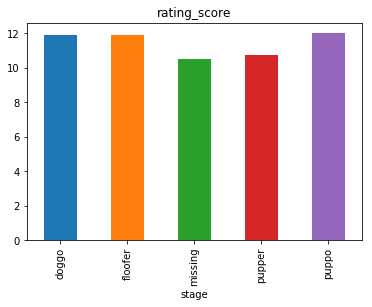

In [357]:
data.groupby('stage').mean()['rating_numerator'].drop('multiple',axis=0).plot(kind='bar', title='rating_score');

4种地位的狗狗获得的评分差别不大，而且平均分数都超过10分，表明这4种地位的狗狗都比较受到人们的喜欢。

#### 观察不同狗狗地位的推特点赞数

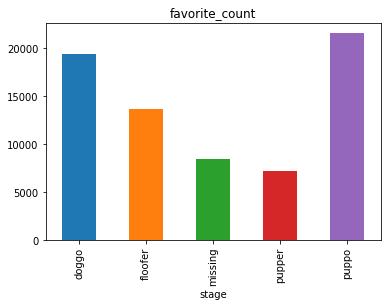

In [78]:
data.groupby('stage').mean()['favorite_count'].drop('multiple',axis=0).plot(kind='bar', title='favorite_count');

关于puppo地位狗狗的推特获得点赞数最多，关于pupper地位狗狗获得点赞数最少

In [79]:
data[['favorite_count','retweet_count']].describe()

,favorite_count,retweet_count
count,1991.000000,1991.000000
mean,8899.343044,2766.526871
std,12221.969511,4678.024127
min,81.000000,16.000000
25%,1976.000000,623.500000
50%,4127.000000,1350.000000
75%,11321.000000,3220.000000
max,132810.000000,79515.000000


#### 观察推特点赞数和转发数的关系

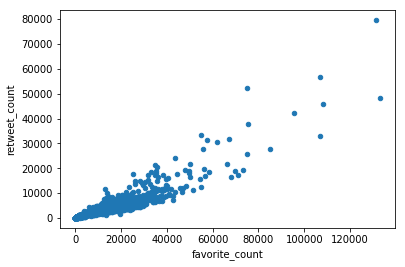

In [80]:
data.plot(x='favorite_count', y='retweet_count', kind='scatter');

点赞数和转发数有轻微的正相关性

#### 点赞数前10的狗狗品种

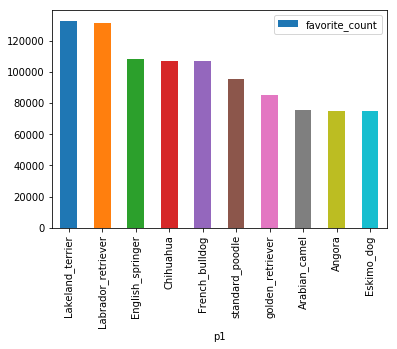

In [81]:
data.sort_values('favorite_count', ascending=False)[['p1', 'favorite_count']].head(10).plot('p1', 'favorite_count', kind='bar');

#### 评分值与推特文章发表时间的关系

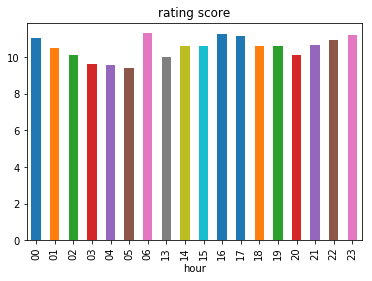

In [82]:
data['hour'] = data.timestamp.str[11:13]
data.groupby('hour').mean()['rating_numerator'].plot(kind='bar');
plt.title('rating score');

#### 出现频率最高的狗狗品种

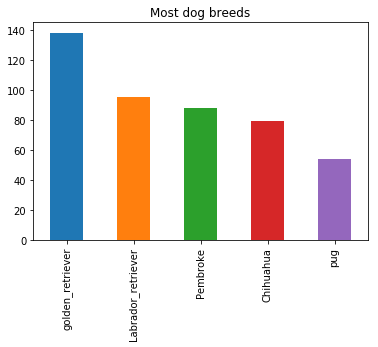

In [366]:
data.img_pred_1.value_counts().head(5).plot(kind='bar', title='Most dog breeds');